# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url = 'https://www.coingecko.com/en/coins/ethereum/historical_data/?start_date=2020-01-01&end_date=2021-06-30'
url_get = requests.get(url, headers = { 'User-Agent': 'Popular browser\'s user-agent'})

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

In [4]:
pages = soup.select('li.page-item:not(.next)')
total_pages = pages[-1].string
total_pages

'10'

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [5]:
table = soup.find('div', {"class":"coingecko-table"})
print(table.prettify()[1:500])

div class="coingecko-table table-responsive" data-controller="historical">
 <div class="tw-flex tw-justify-end tw-items-center">
 </div>
 <div class="tw-flex flex-column flex-md-row tw-justify-end tw-items-end align-items-md-center py-2">
  <div class="py-1 pr-md-2 range-links">
   <a class="mx-1" href="/en/coins/ethereum/historical_data?end_date=2022-07-07&amp;start_date=2022-06-30#panel">
    7d
   </a>
   <a class="mx-1" href="/en/coins/ethereum/historical_data?end_date=2022-07-07&amp;start_


Finding row length.

In [6]:
rows = table.find('tbody').find_all('tr')
row_length = len(rows)
row_length

60

Do the scrapping process here (please change this markdown with your explanation)

In [7]:
temp = [] #initiating a tuple

# loop all pages & get the data
for page in range(1, (int(total_pages) + 1)):
    url = 'https://www.coingecko.com/en/coins/ethereum/historical_data/?start_date=2020-01-01&end_date=2021-06-30&page=' + str(page)
    url_get = requests.get(url, headers = { 'User-Agent': 'Popular browser\'s user-agent'})
    soup = BeautifulSoup(url_get.content,"html.parser")
    #scrapping process
    table = soup.find('div', {"class":"coingecko-table"})
    rows = table.find('tbody').find_all('tr')
    row_length = len(rows)
    for i in range(0, row_length):
        date = str(rows[i].find('th').string)
        volume = rows[i].find_all('td')[1].string
        temp.append({"Date":date,"Volume":volume})
len(temp)

547

## Creating data frame & Data wrangling

Put the array into dataframe

In [8]:
import pandas as pd

df = pd.DataFrame(temp)
df.head()

,Date,Volume
0,2021-06-30,"\n$27,149,143,847\n"
1,2021-06-29,"\n$30,629,329,806\n"
2,2021-06-28,"\n$24,316,408,028\n"
3,2021-06-27,"\n$24,249,510,321\n"
4,2021-06-26,"\n$25,981,381,067\n"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [9]:
# Remove \n, $, , from Volume and change to float dtype
df['Volume'] = df['Volume'].str.strip().\
str.replace('$', '', regex=False).\
str.replace(',', '', regex=False).\
astype('float')

# Change volume to smaller digit (million)
df['Volume'] = (df['Volume'] / 1e6).round(2)

In [10]:
# Change Date to datetime
df['Date'] = df['Date'].astype('datetime64[ns]')

In [11]:
# Set index to Date
df = df.set_index('Date')

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

<AxesSubplot:xlabel='Date'>

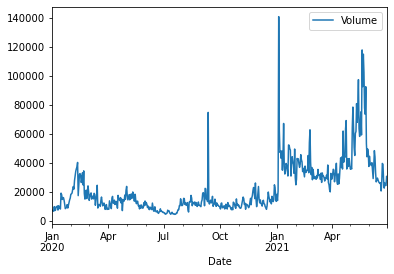

In [12]:
df.sort_values(by='Date', ascending=True).plot(y='Volume')

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 


(Put your analysis and conclusion here.)

### Volume Ethereum di sekitar bulan January 2021 adalah paling tinggi

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.